In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error


In [3]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']
data = yf.download(tickers, start='2015-01-01', end='2025-01-01')['Close']
data

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2015-01-02,24.347176,26.381865,40.232853,14.620667
2015-01-05,23.661272,25.879185,39.862888,14.006000
2015-01-06,23.663500,25.240501,39.277802,14.085333
2015-01-07,23.995314,25.166271,39.776840,14.063333
2015-01-08,24.917273,25.253954,40.946995,14.041333
...,...,...,...,...
2024-12-24,258.200012,196.110001,439.329987,462.279999
2024-12-26,259.019989,195.600006,438.109985,454.130005
2024-12-27,255.589996,192.759995,430.529999,431.660004


In [5]:
def moving_average_strategy(data, short_window=20, long_window=50):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_ma'] = data.rolling(window=short_window).mean()
    signals['long_ma'] = data.rolling(window=long_window).mean()
    signals['signal'] = np.where(signals['short_ma'] > signals['long_ma'], 1, 0)
    return signals


In [6]:
def backtest_strategy(signals, initial_capital=10000):
    portfolio = pd.DataFrame(index=signals.index)
    portfolio['position'] = signals['signal'].shift(1)
    portfolio['daily_returns'] = signals['price'].pct_change()
    portfolio['strategy_returns'] = portfolio['daily_returns'] * portfolio['position']
    portfolio['cumulative_returns'] = (1 + portfolio['strategy_returns']).cumprod()
    return portfolio['cumulative_returns']


In [7]:
def optimize_strategy(data):
    def objective(params):
        short_window, long_window = int(params[0]), int(params[1])
        signals = moving_average_strategy(data, short_window, long_window)
        returns = backtest_strategy(signals)
        return -returns.iloc[-1]  # Maximize o retorno acumulado

    bounds = [(5, 50), (20, 200)]  # Limites para janelas curtas e longas
    result = minimize(objective, x0=[20, 50], bounds=bounds)
    return result.x


In [8]:
# Otimização de Média-Variância
def portfolio_optimization(weights, returns):
    portfolio_return = np.dot(weights, returns.mean())
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    return -sharpe_ratio  # Maximizar o Sharpe Ratio


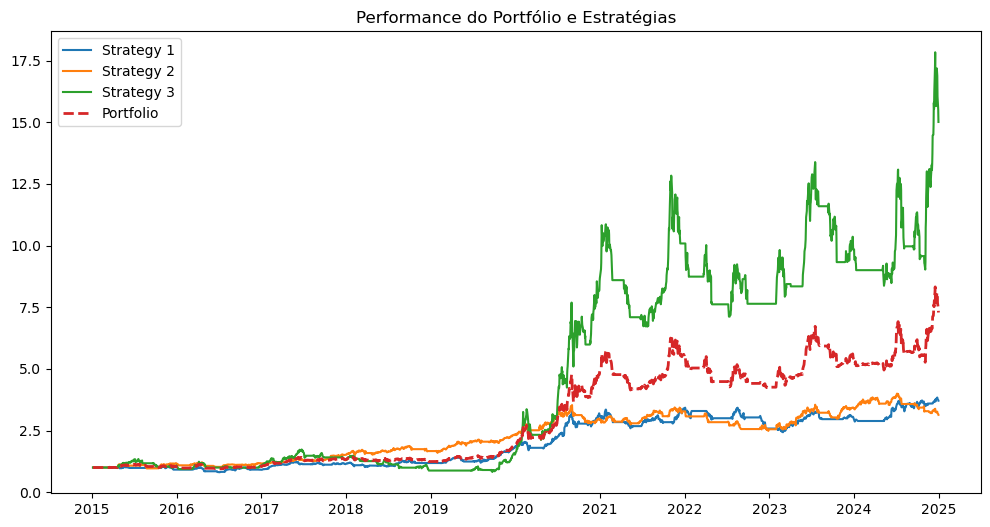

In [13]:
# Supondo que você tenha dados para cada estratégia:
signals1 = moving_average_strategy(data['AAPL'], short_window=20, long_window=50)
signals2 = moving_average_strategy(data['MSFT'], short_window=10, long_window=40)
signals3 = moving_average_strategy(data['TSLA'], short_window=10, long_window=40)

# Retornos de cada estratégia
strat1_returns = backtest_strategy(signals1, initial_capital=10000)
strat2_returns = backtest_strategy(signals2, initial_capital=10000)
strat3_returns = backtest_strategy(signals3, initial_capital=10000)

# Combinar estratégias no portfólio
strategies = {'Strategy 1': strat1_returns, 'Strategy 2': strat2_returns, 'Strategy 3': strat3_returns}
portfolio = sum(strategies.values()) / len(strategies)

# Visualizar os resultados
plt.figure(figsize=(12, 6))
for name, returns in strategies.items():
    plt.plot(returns, label=name)
plt.plot(portfolio, label='Portfolio', linewidth=2, linestyle='--')
plt.legend()
plt.title('Performance do Portfólio e Estratégias')
plt.show()


In [23]:
stock = yf.download('TSLA', start='2015-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(stock[['Close']])


C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
from statsmodels.tsa.arima.model import ARIMA

stock = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
model = ARIMA(stock['Close'], order=(5, 1, 0))
results = model.fit()
predictions = results.forecast(steps=10)

[*********************100%***********************]  1 of 1 completed
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is availa

In [26]:
stock.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [28]:
from sklearn.ensemble import RandomForestRegressor

X = stock[['Open', 'Volume']]  # Recursos
y = stock['Close'].shift(-1)  # Preço do dia seguinte
model = RandomForestRegressor()
model.fit(X[:-1], y[:-1])
predictions = model.predict(X[-1:])


C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Guilherme Caetano\AppData\Local\Temp\ipykernel_10588\4039154316.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X[:-1], y[:-1])
C:\Users\Guilherme Caetano\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


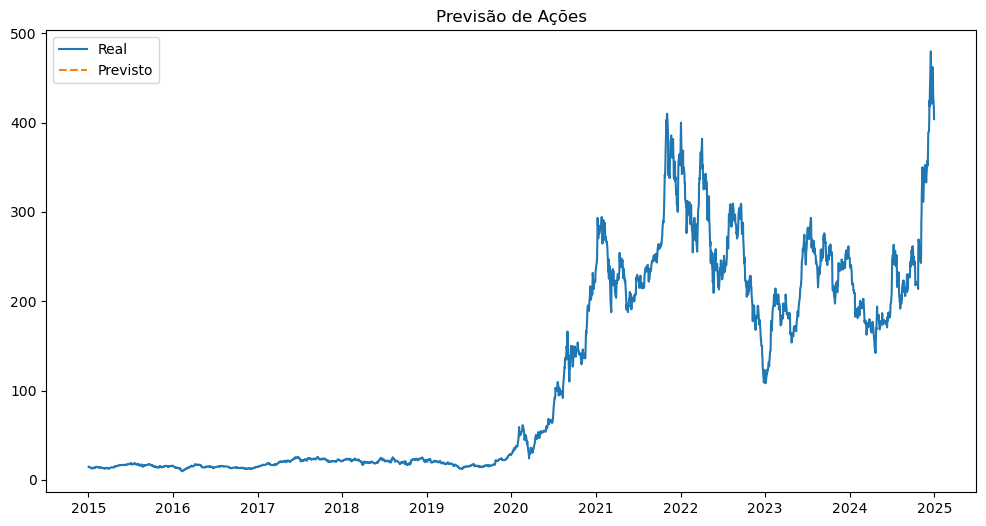

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, stock['Close'], label='Real')
plt.plot(data.index[-len(predictions):], predictions, label='Previsto', linestyle='--')
plt.legend()
plt.title('Previsão de Ações')
plt.show()
